In [32]:
# importing required libraries
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#reading the car data from csv file

import pandas as pd
data=pd.read_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\Hyderabad.csv')
data

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Turning Radius,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,4.9,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,...,4.6 metres,Disc,Drum,Tubeless,R16,5,215-litres,135 Kmph,19 Seconds,NaN
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,...,4.6 metres,Disc,Drum,"Tubeless, Radial",R16,5,215-litres,135 Kmph,19 Seconds,NaN
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,...,4.9 meters,Disc,Drum,"Tubeless,Radial",16,5,339-litres,180 Kmph,12.36 seconds,NaN
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,...,4.9 meters,Disc,Drum,"Radial, Tubeless",18,3,339-litres,180 Kmph,12.36 seconds,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,...,5.6 metres,Disc & Caliper Type,Disc & Caliper Type,"Tubeless,Radial",17,5,485,175 kmph,12.5 Seconds,145mm
1479,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,...,5.75 metres,Disc,Disc,"Tubeless,Radial",20,4,540-litres,250 Kmph,6.4 Seconds,145mm
1480,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,...,5.6,Ventilated Disc,Ventilated Disc,"Tubeless, Runflat",R18,4,520-litres,235kmph,7.5,145mm
1481,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,...,5.1m,Disc,Drum,Tubeless Radial Tyres,R18,5,350,154.19 kmph,13.25 Seconds,209 mm


In [34]:
#check for null records
data.isnull().sum()

it                           0
ft                           0
bt                           2
km                           0
transmission                 0
                            ..
No Door Numbers              0
Cargo Volumn                 0
Top Speed                    1
Acceleration                 1
Ground Clearance Unladen    12
Length: 68, dtype: int64

In [35]:
#column names
data.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Fuel Type', 'Insurance Validity', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats', 'Transmission',
       'Year of Manufacture', 'Features', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Wheel Size', 'Seats.1', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size

In [36]:
# dropping columns post feature selection
Hyderabad_final_data=data.drop(columns=['it', 'ft', 'transmission', 'owner', 'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats',
       'Year of Manufacture', 'Features',
       'Torque', 'Seats.1', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size',
       'Alloy Wheel Size', 'Ground Clearance Unladen'],inplace=True)



In [37]:
#selected features for further cleansing
data.columns

Index(['bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'price',
       'Fuel Type', 'Insurance Validity', 'Transmission', 'Mileage', 'Engine',
       'Max Power', 'Color', 'Seating Capacity'],
      dtype='object')

In [38]:
data.isnull().sum()  # check for null records 

bt                    2
km                    0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Fuel Type             0
Insurance Validity    0
Transmission          0
Mileage               0
Engine                0
Max Power             0
Color                 0
Seating Capacity      0
dtype: int64

In [39]:
data.dtypes

bt                    object
km                    object
ownerNo                int64
oem                   object
model                 object
modelYear              int64
price                 object
Fuel Type             object
Insurance Validity    object
Transmission          object
Mileage               object
Engine                object
Max Power             object
Color                 object
Seating Capacity       int64
dtype: object

In [40]:
# column name renaming -standaradization
dict={'bt':'Car_type',
      'km':'Kms_driven',
      'ownerNo':'No_of_owners',
      'model':'Car_model',
      'oem':'Car_name',
      'modelYear':'Model_Year',
      'price':'Car_price',
      'Fuel Type':'Fuel_type',
      'Insurance Validity':'Insurance_type',
      'Seating Capacity':'Seating_capacity',
      'Max Power':'Max_power'
      }
data.rename(columns =dict , inplace = True)


data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Hatchback,"20,000",1,Volkswagen,Volkswagen Polo,2022,₹ 10.44 Lakh,Petrol,Third Party insurance,Automatic,16.47 kmpl,999 CC,108.62bhp@5000-5500rpm,Others,5
1,Hatchback,"85,582",2,Hyundai,Hyundai EON,2014,₹ 2.60 Lakh,Petrol,Third Party insurance,Manual,21.1 kmpl,814 CC,55.2bhp@5500rpm,Red,5
2,SUV,"10,000",1,Hyundai,Hyundai Venue,2023,₹ 9.55 Lakh,Petrol,Third Party insurance,Manual,21.1 kmpl,1197 CC,81.80bhp@6000rpm,Others,5
3,Hatchback,"50,750",1,Maruti,Maruti Baleno,2017,₹ 6.71 Lakh,Petrol,Third Party insurance,Manual,21.4 kmpl,1197 CC,83.1bhp@6000rpm,Red,5
4,SUV,"10,000",1,Mahindra,Mahindra Thar,2022,₹ 19 Lakh,Petrol,Third Party insurance,Automatic,21.4 kmpl,1997 CC,150bhp@5000rpm,Others,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,SUV,"60,000",1,Mahindra,Mahindra XUV500,2013,₹ 7 Lakh,Diesel,Third Party insurance,Manual,15.1 kmpl,2179 CC,140bhp@3750rpm,Others,7
1479,Sedan,"50,000",1,Jaguar,Jaguar XF,2014,₹ 20 Lakh,Diesel,Third Party insurance,Automatic,14.74 kmpl,2993 CC,270.9bhp@4000rpm,Blue,5
1480,Sedan,"1,20,000",3,BMW,BMW 5 Series,2018,₹ 35 Lakh,Diesel,Third Party insurance,Automatic,20.37 kmpl,1995 CC,187.74bhp@4000rpm,Blue,5
1481,SUV,"50,000",2,Tata,Tata Nexon,2019,₹ 8.50 Lakh,Diesel,Third Party insurance,Automatic,21.5 kmpl,1497 CC,108.5bhp@3750rpm,Others,5


In [41]:
# Function to convert lakh to numerical format
def convert_lakh_to_numeric(value):
    if 'lakh' in value:
        num = float(value.replace(' lakh', '').strip().replace(',', ''))
        return int(num * 100000)
    elif 'crore' in value:
        num = float(value.replace(' crore', '').strip().replace(',', ''))
        return int(num * 10000000)
    return value


In [42]:
# Function to extract and convert max power in PS to BHP 
import re
import numpy as np
def extract_and_convert(power_str):
    # Check for BHP
    bhp_match = re.search(r'(\d+\.?\d*)\s*bhp', power_str, re.IGNORECASE)
    if bhp_match:
        return float(bhp_match.group(1))  # Return BHP as float
    
    # Check for PS, allow for variations in format
    ps_match = re.search(r"(\d+(\.\d*)?)", power_str, re.IGNORECASE)
    if ps_match:
        print(f"{power_str} --> {ps_match}")
        ps_value = float(ps_match.group(1).replace(',', ''))  # Remove commas
        return ps_value * 0.98632  # Convert PS to BHP
    
    return np.nan  # Return NaN if no match

In [43]:
# Column data type conversion with regex replace to get numerical data
data['Max_power']=data['Max_power'].apply(extract_and_convert).astype(float)

90 PS@ 4000 rpm  --> <re.Match object; span=(0, 2), match='90'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
80 PS at 5200 rpm --> <re.Match object; span=(0, 2), match='80'>
101 @ 6,500 (PS@rpm) --> <re.Match object; span=(0, 3), match='101'>
170 @ 3,700 (PS@rpm) --> <re.Match object; span=(0, 3), match='170'>
68 @ 4,000 (PS@rpm) --> <re.Match object; span=(0, 2), match='68'>
174.33@3750rpm --> <re.Match object; span=(0, 6), match='174.33'>
78 @ 5,500 (PS@rpm) --> <re.Match object; span=(0, 2), match='78'>
103.2 @ 5,500 (PS@rpm) --> <re.Match object; span=(0, 5), match='103.2'>
165 [224] at 3800 --> <re.Match object; span=(0, 3), match='165'>
165 [224] at 3800 --> <re.Match object; span=(0, 3), match='165'>
102@3,600 (PS@rpm) --> <re.Match object; span=(0, 3), match='102'>
210@4000 (PS@rpm) --> <re.Match object; span=(0, 3), match='210'>
90 PS@ 4000 rpm  --> <re.Match object; span=(0, 2), match='90'>
80 PS at 5200 rpm --> <re.Match object; span=(0, 2), match='80'>

In [44]:
# Column data type conversion with regex replace to get numerical data
data['Car_price'] = data['Car_price'].str.lower().replace(r'[^\d.a-zA-Z ]','',regex=True).apply(convert_lakh_to_numeric).astype(int)
data['Mileage']=data['Mileage'].str.lower().replace(r'[^\d.]','',regex=True).astype(float)
data['Kms_driven']=data['Kms_driven'].str.replace(r'[^\d]','',regex=True).astype(int)
data['Engine']=data['Engine'].str.replace(r'[^\d]','',regex=True).astype(int)
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Hatchback,20000,1,Volkswagen,Volkswagen Polo,2022,1044000,Petrol,Third Party insurance,Automatic,16.47,999,108.62,Others,5
1,Hatchback,85582,2,Hyundai,Hyundai EON,2014,260000,Petrol,Third Party insurance,Manual,21.10,814,55.20,Red,5
2,SUV,10000,1,Hyundai,Hyundai Venue,2023,955000,Petrol,Third Party insurance,Manual,21.10,1197,81.80,Others,5
3,Hatchback,50750,1,Maruti,Maruti Baleno,2017,671000,Petrol,Third Party insurance,Manual,21.40,1197,83.10,Red,5
4,SUV,10000,1,Mahindra,Mahindra Thar,2022,1900000,Petrol,Third Party insurance,Automatic,21.40,1997,150.00,Others,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,SUV,60000,1,Mahindra,Mahindra XUV500,2013,700000,Diesel,Third Party insurance,Manual,15.10,2179,140.00,Others,7
1479,Sedan,50000,1,Jaguar,Jaguar XF,2014,2000000,Diesel,Third Party insurance,Automatic,14.74,2993,270.90,Blue,5
1480,Sedan,120000,3,BMW,BMW 5 Series,2018,3500000,Diesel,Third Party insurance,Automatic,20.37,1995,187.74,Blue,5
1481,SUV,50000,2,Tata,Tata Nexon,2019,850000,Diesel,Third Party insurance,Automatic,21.50,1497,108.50,Others,5


In [45]:
data.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_name', 'Car_model',
       'Model_Year', 'Car_price', 'Fuel_type', 'Insurance_type',
       'Transmission', 'Mileage', 'Engine', 'Max_power', 'Color',
       'Seating_capacity'],
      dtype='object')

In [46]:
data.dtypes

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_name             object
Car_model            object
Model_Year            int64
Car_price             int64
Fuel_type            object
Insurance_type       object
Transmission         object
Mileage             float64
Engine                int64
Max_power           float64
Color                object
Seating_capacity      int64
dtype: object

In [37]:
data.to_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\final_cleaned_csv_files\edited_HYDdata.csv',encoding='utf-8',index=False)

In [38]:
data.shape

(1483, 15)

In [39]:
print(data['No_of_owners'].unique())

[1 2 3 4 5]


In [40]:
print(data['Transmission'].unique())

['Automatic' 'Manual']


In [41]:
print(data['Model_Year'].unique())

[2022 2014 2023 2017 2021 2018 2020 2013 2009 2019 2016 2015 2012 2011
 2010 2008 2001 2003 2006 2007 2004 1985 2002 1997 2005]


In [42]:
print(data['Fuel_type'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [43]:
print(data['Car_type'].unique())

['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' nan 'Pickup Trucks']


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_type          1481 non-null   object 
 1   Kms_driven        1483 non-null   int64  
 2   No_of_owners      1483 non-null   int64  
 3   Car_name          1483 non-null   object 
 4   Car_model         1483 non-null   object 
 5   Model_Year        1483 non-null   int64  
 6   Car_price         1483 non-null   int64  
 7   Fuel_type         1483 non-null   object 
 8   Insurance_type    1483 non-null   object 
 9   Transmission      1483 non-null   object 
 10  Mileage           1483 non-null   float64
 11  Engine            1483 non-null   int64  
 12  Max_power         1483 non-null   float64
 13  Color             1483 non-null   object 
 14  Seating_capacity  1483 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 173.9+ KB


In [45]:
data.describe

<bound method NDFrame.describe of        Car_type  Kms_driven  No_of_owners    Car_name        Car_model  \
0     Hatchback       20000             1  Volkswagen  Volkswagen Polo   
1     Hatchback       85582             2     Hyundai      Hyundai EON   
2           SUV       10000             1     Hyundai    Hyundai Venue   
3     Hatchback       50750             1      Maruti    Maruti Baleno   
4           SUV       10000             1    Mahindra    Mahindra Thar   
...         ...         ...           ...         ...              ...   
1478        SUV       60000             1    Mahindra  Mahindra XUV500   
1479      Sedan       50000             1      Jaguar        Jaguar XF   
1480      Sedan      120000             3         BMW     BMW 5 Series   
1481        SUV       50000             2        Tata       Tata Nexon   
1482        MUV      100000             1      Toyota    Toyota Innova   

      Model_Year  Car_price Fuel_type         Insurance_type Transmission  \


In [46]:
data.describe()

,Kms_driven,No_of_owners,Model_Year,Car_price,Mileage,Engine,Max_power,Seating_capacity
count,1483.000000,1483.000000,1483.000000,1.483000e+03,1483.000000,1483.000000,1483.000000,1483.000000
mean,65858.932569,1.339177,2016.383007,8.325287e+05,19.736244,1377.516521,99.517538,5.175320
std,33130.088990,0.557366,4.052327,1.024763e+06,3.615089,424.507873,38.762161,0.622572
min,0.000000,1.000000,1985.000000,2.016100e+04,8.000000,0.000000,37.000000,2.000000
25%,40339.000000,1.000000,2014.000000,4.000000e+05,17.400000,1197.000000,74.000000,5.000000
50%,64000.000000,1.000000,2017.000000,6.050000e+05,19.670000,1199.000000,88.500000,5.000000
75%,90000.000000,2.000000,2019.000000,9.090000e+05,22.070000,1498.000000,117.300000,5.000000
max,260000.000000,5.000000,2023.000000,2.600000e+07,35.600000,3198.000000,402.300000,10.000000


In [47]:
# Descriptive statistical summary of categorical features
data.describe(include= 'object')

,Car_type,Car_name,Car_model,Fuel_type,Insurance_type,Transmission,Color
count,1481,1483,1483,1483,1483,1483,1483
unique,7,26,194,5,5,2,62
top,Hatchback,Maruti,Maruti Swift,Petrol,Third Party insurance,Manual,Others
freq,683,440,76,932,967,1106,392


In [50]:
# calculating vehicle age as feature
from datetime import datetime

current_year = datetime.now().year

# Calculate age
data['Vehicle_age']= current_year - data['Model_Year']
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,Vehicle_age
0,Hatchback,20000,1,Volkswagen,Volkswagen Polo,2022,1044000,Petrol,Third Party insurance,Automatic,16.47,999,108.62,Others,5,2
1,Hatchback,85582,2,Hyundai,Hyundai EON,2014,260000,Petrol,Third Party insurance,Manual,21.10,814,55.20,Red,5,10
2,SUV,10000,1,Hyundai,Hyundai Venue,2023,955000,Petrol,Third Party insurance,Manual,21.10,1197,81.80,Others,5,1
3,Hatchback,50750,1,Maruti,Maruti Baleno,2017,671000,Petrol,Third Party insurance,Manual,21.40,1197,83.10,Red,5,7
4,SUV,10000,1,Mahindra,Mahindra Thar,2022,1900000,Petrol,Third Party insurance,Automatic,21.40,1997,150.00,Others,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,SUV,60000,1,Mahindra,Mahindra XUV500,2013,700000,Diesel,Third Party insurance,Manual,15.10,2179,140.00,Others,7,11
1479,Sedan,50000,1,Jaguar,Jaguar XF,2014,2000000,Diesel,Third Party insurance,Automatic,14.74,2993,270.90,Blue,5,10
1480,Sedan,120000,3,BMW,BMW 5 Series,2018,3500000,Diesel,Third Party insurance,Automatic,20.37,1995,187.74,Blue,5,6
1481,SUV,50000,2,Tata,Tata Nexon,2019,850000,Diesel,Third Party insurance,Automatic,21.50,1497,108.50,Others,5,5


In [51]:
# Feature Engineering steps

data_next=data.copy()

# dropping unnecessary features for further analysis

data_next.drop(columns= ['Car_name','Model_Year','Car_model','Color'],axis= 1, inplace= True) 
data_next

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,20000,1,1044000,Petrol,Third Party insurance,Automatic,16.47,999,108.62,5,2
1,Hatchback,85582,2,260000,Petrol,Third Party insurance,Manual,21.10,814,55.20,5,10
2,SUV,10000,1,955000,Petrol,Third Party insurance,Manual,21.10,1197,81.80,5,1
3,Hatchback,50750,1,671000,Petrol,Third Party insurance,Manual,21.40,1197,83.10,5,7
4,SUV,10000,1,1900000,Petrol,Third Party insurance,Automatic,21.40,1997,150.00,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1478,SUV,60000,1,700000,Diesel,Third Party insurance,Manual,15.10,2179,140.00,7,11
1479,Sedan,50000,1,2000000,Diesel,Third Party insurance,Automatic,14.74,2993,270.90,5,10
1480,Sedan,120000,3,3500000,Diesel,Third Party insurance,Automatic,20.37,1995,187.74,5,6
1481,SUV,50000,2,850000,Diesel,Third Party insurance,Automatic,21.50,1497,108.50,5,5


In [52]:
print("'Vehicle age' variable have {} unique category : {}".format(data_next['Vehicle_age'].nunique(), 
                                                                   data_next['Vehicle_age'].unique()))

'Vehicle age' variable have 25 unique category : [ 2 10  1  7  3  6  4 11 15  5  8  9 12 13 14 16 23 21 18 17 20 39 22 27
 19]


In [31]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity
0,Hatchback,"20,000",1,₹ 10.44 Lakh,Petrol,Third Party insurance,Automatic,16.47 kmpl,999 CC,108.62,5
1,Hatchback,"85,582",2,₹ 2.60 Lakh,Petrol,Third Party insurance,Manual,21.1 kmpl,814 CC,55.20,5
2,SUV,"10,000",1,₹ 9.55 Lakh,Petrol,Third Party insurance,Manual,21.1 kmpl,1197 CC,81.80,5
3,Hatchback,"50,750",1,₹ 6.71 Lakh,Petrol,Third Party insurance,Manual,21.4 kmpl,1197 CC,83.10,5
4,SUV,"10,000",1,₹ 19 Lakh,Petrol,Third Party insurance,Automatic,21.4 kmpl,1997 CC,150.00,4


Data Visualization

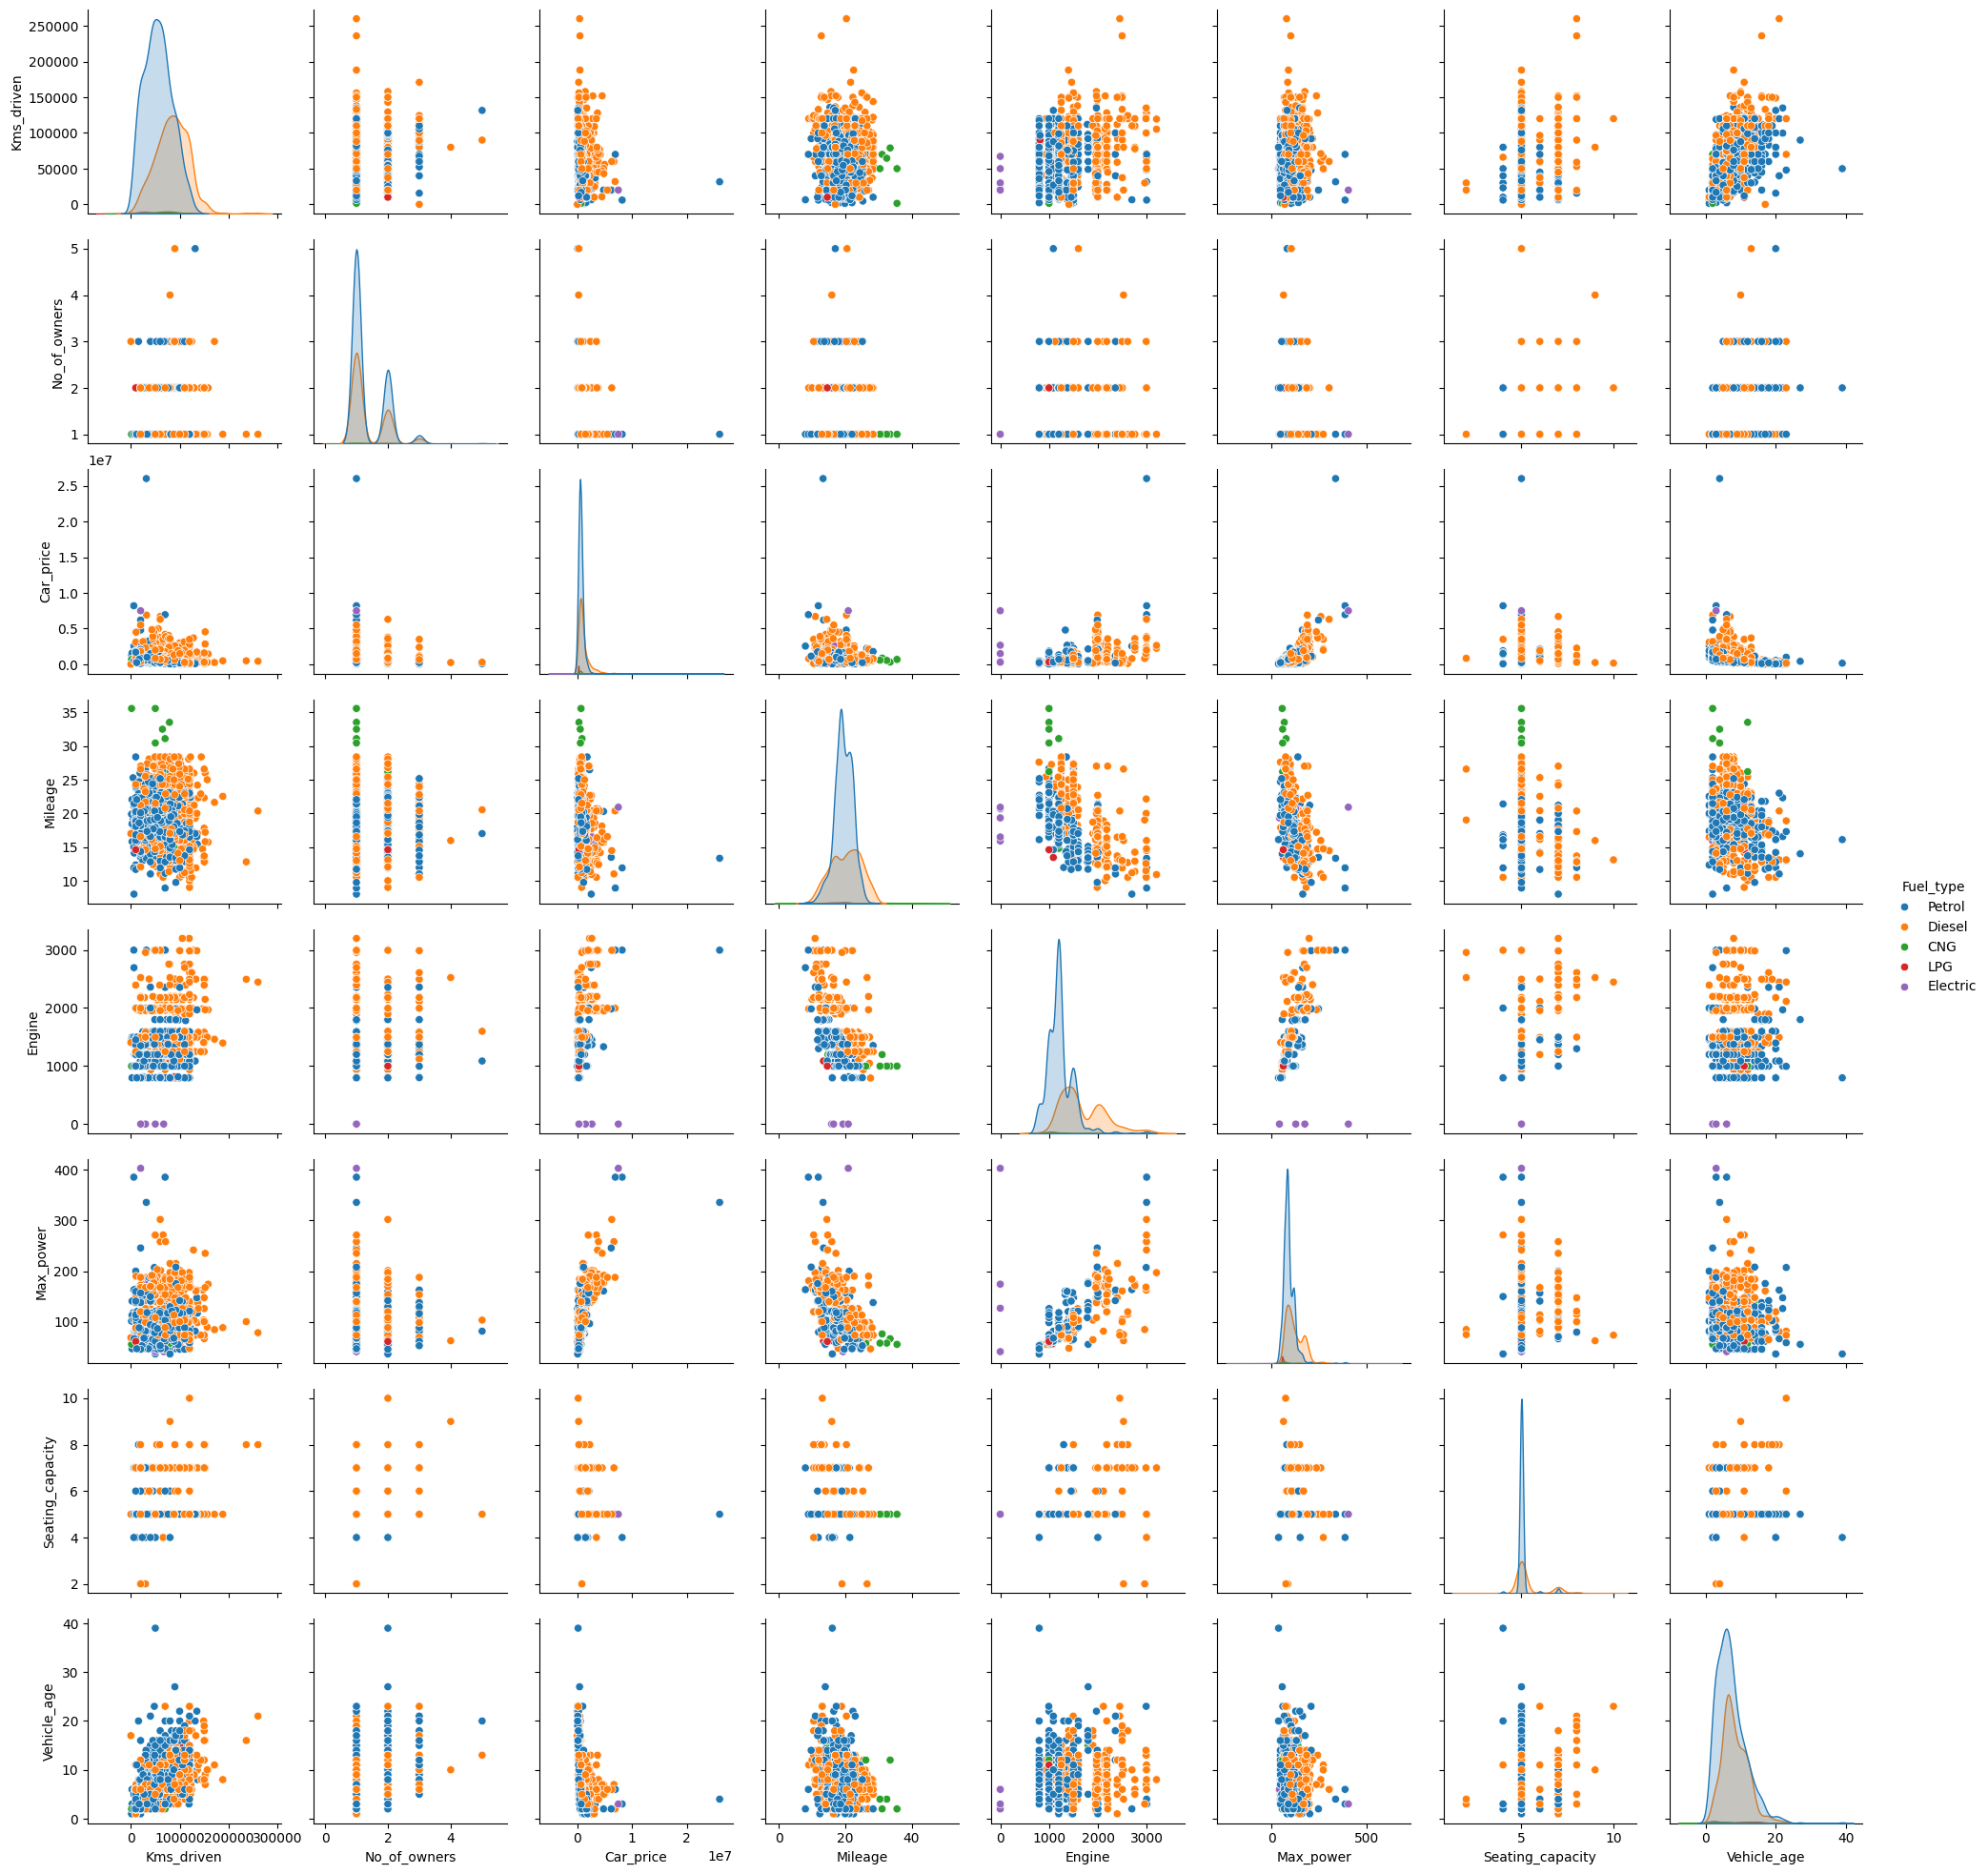

In [53]:
sns.pairplot(data=data_next, hue= 'Fuel_type', diag_kind= 'kde')

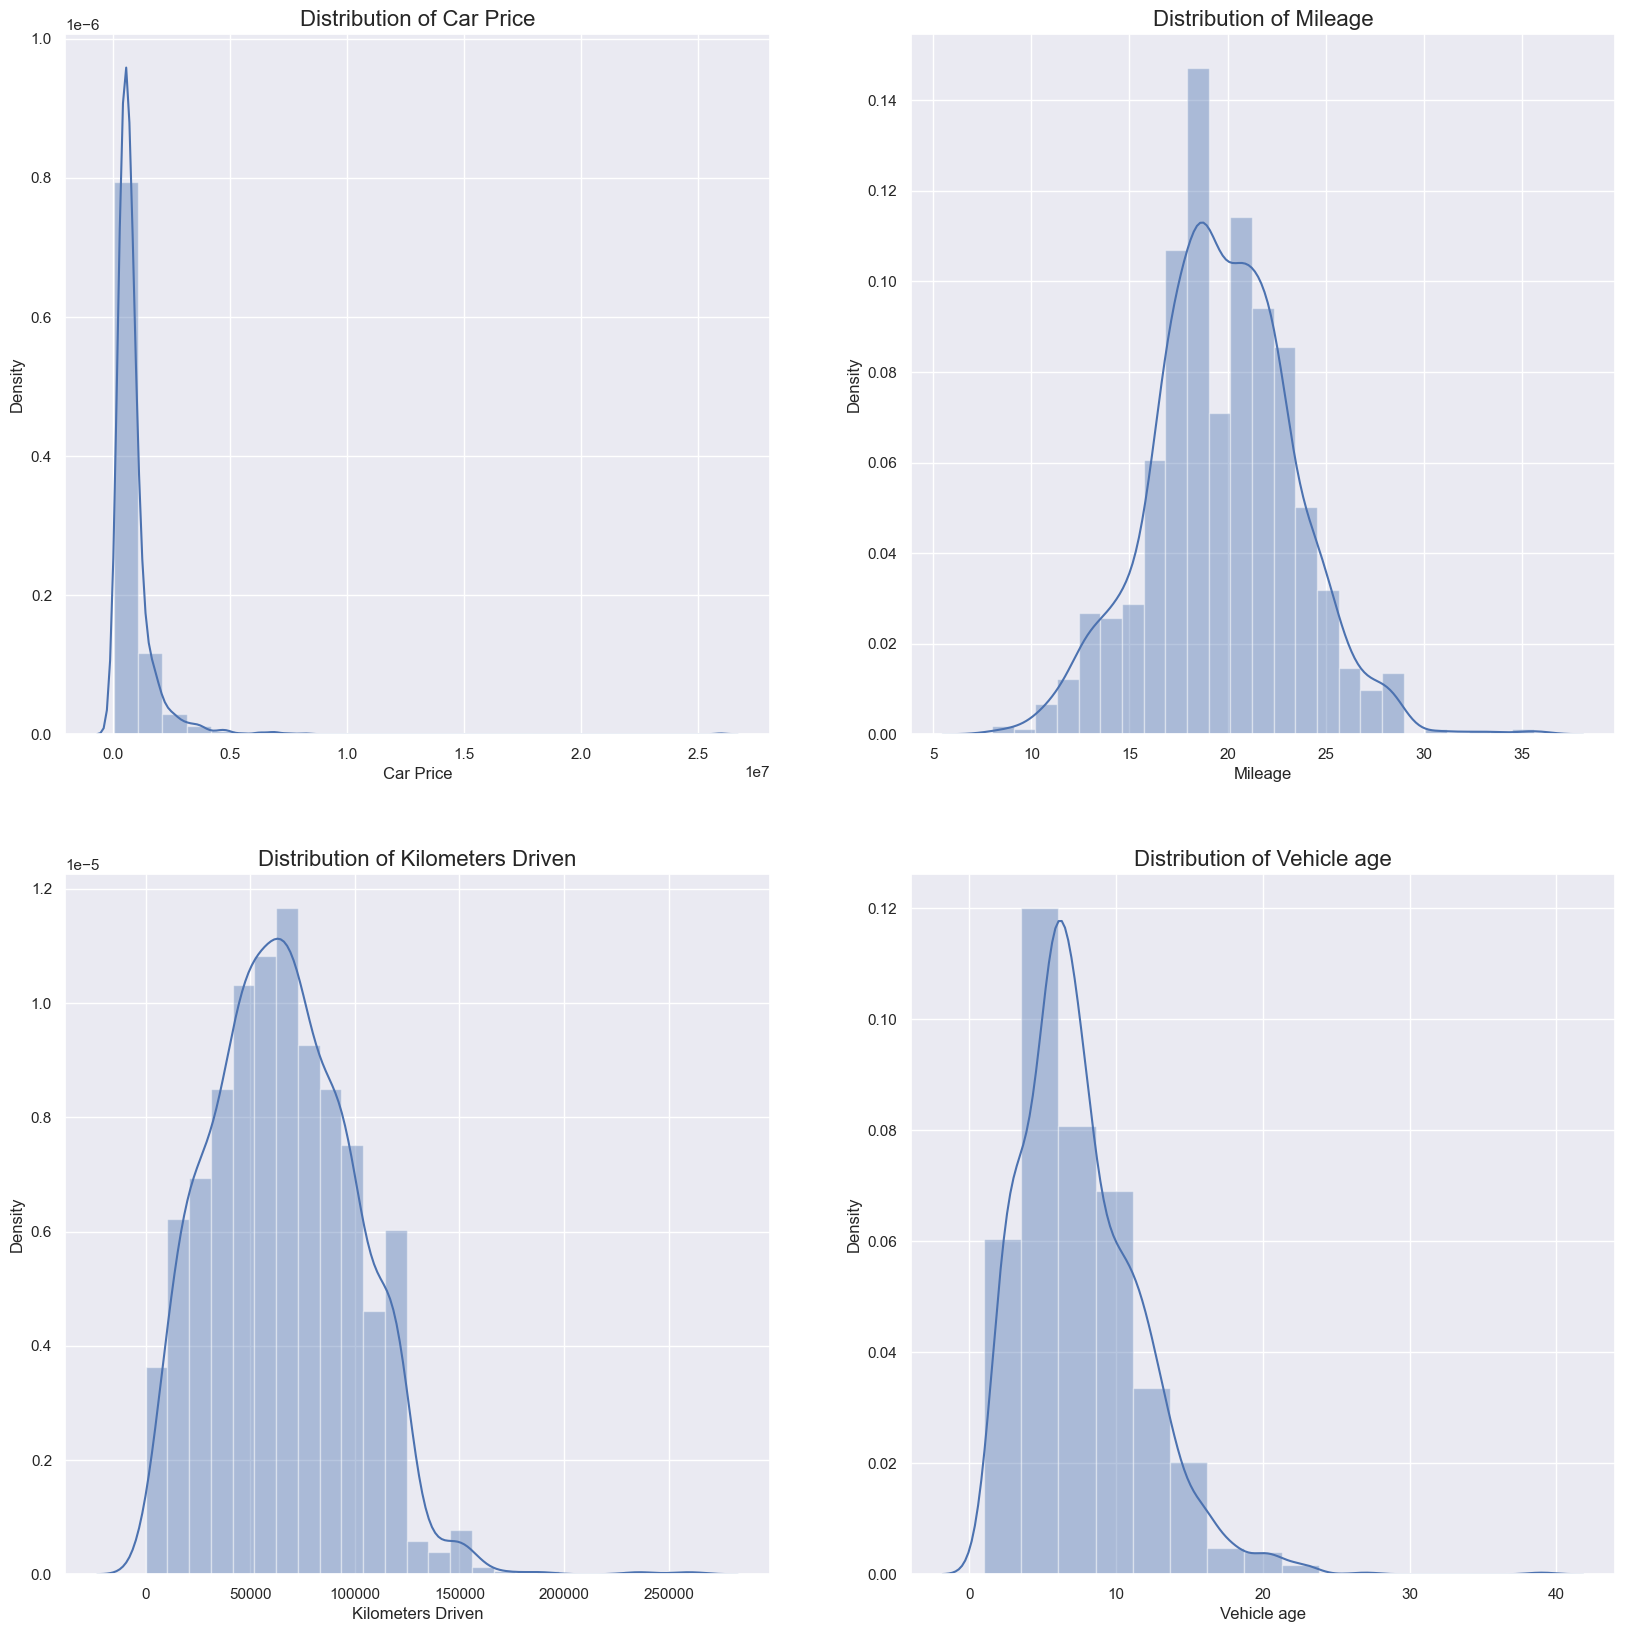

In [53]:
# Let's see the distribution of the variables from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = data_next['Car_price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Car Price', fontsize=16)
ax0.set(xlabel= 'Car Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Mileage' feature
k2 = sns.distplot(a = data_next['Mileage'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Mileage', fontsize=16)
ax1.set(xlabel= 'Mileage', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = data_next['Kms_driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = data_next['Vehicle_age'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Vehicle age', fontsize=16)
ax3.set(xlabel= 'Vehicle age', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")


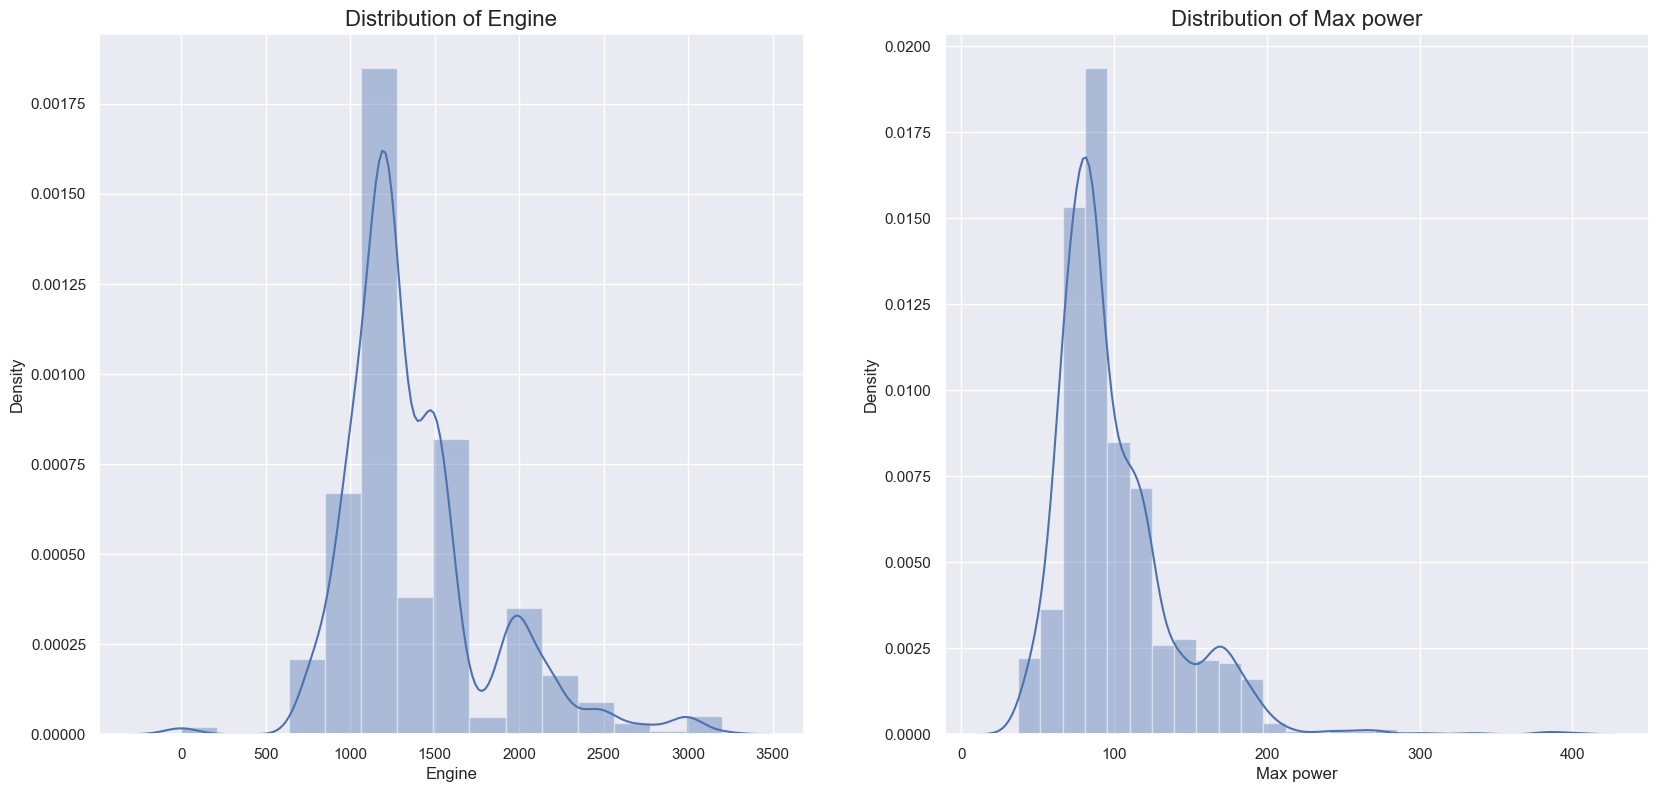

In [54]:
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)

# Subplot 5: Distplot of 'Engine' feature
k1 = sns.distplot(a = data_next['Engine'], bins= 15, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Engine', fontsize=16)
ax0.set(xlabel= 'Engine', ylabel= 'Density')

# Subplot 6: Distplot of 'Max power' feature
k2 = sns.distplot(a = data_next['Max_power'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Max power', fontsize=16)
ax1.set(xlabel= 'Max power', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [55]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,20000,1,1044000,Petrol,Third Party insurance,Automatic,16.47,999,108.62,5,2
1,Hatchback,85582,2,260000,Petrol,Third Party insurance,Manual,21.10,814,55.20,5,10
2,SUV,10000,1,955000,Petrol,Third Party insurance,Manual,21.10,1197,81.80,5,1
3,Hatchback,50750,1,671000,Petrol,Third Party insurance,Manual,21.40,1197,83.10,5,7
4,SUV,10000,1,1900000,Petrol,Third Party insurance,Automatic,21.40,1997,150.00,4,2


In [55]:
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)
cat_col


['Fuel_type', 'Insurance_type', 'Transmission', 'Car_type']

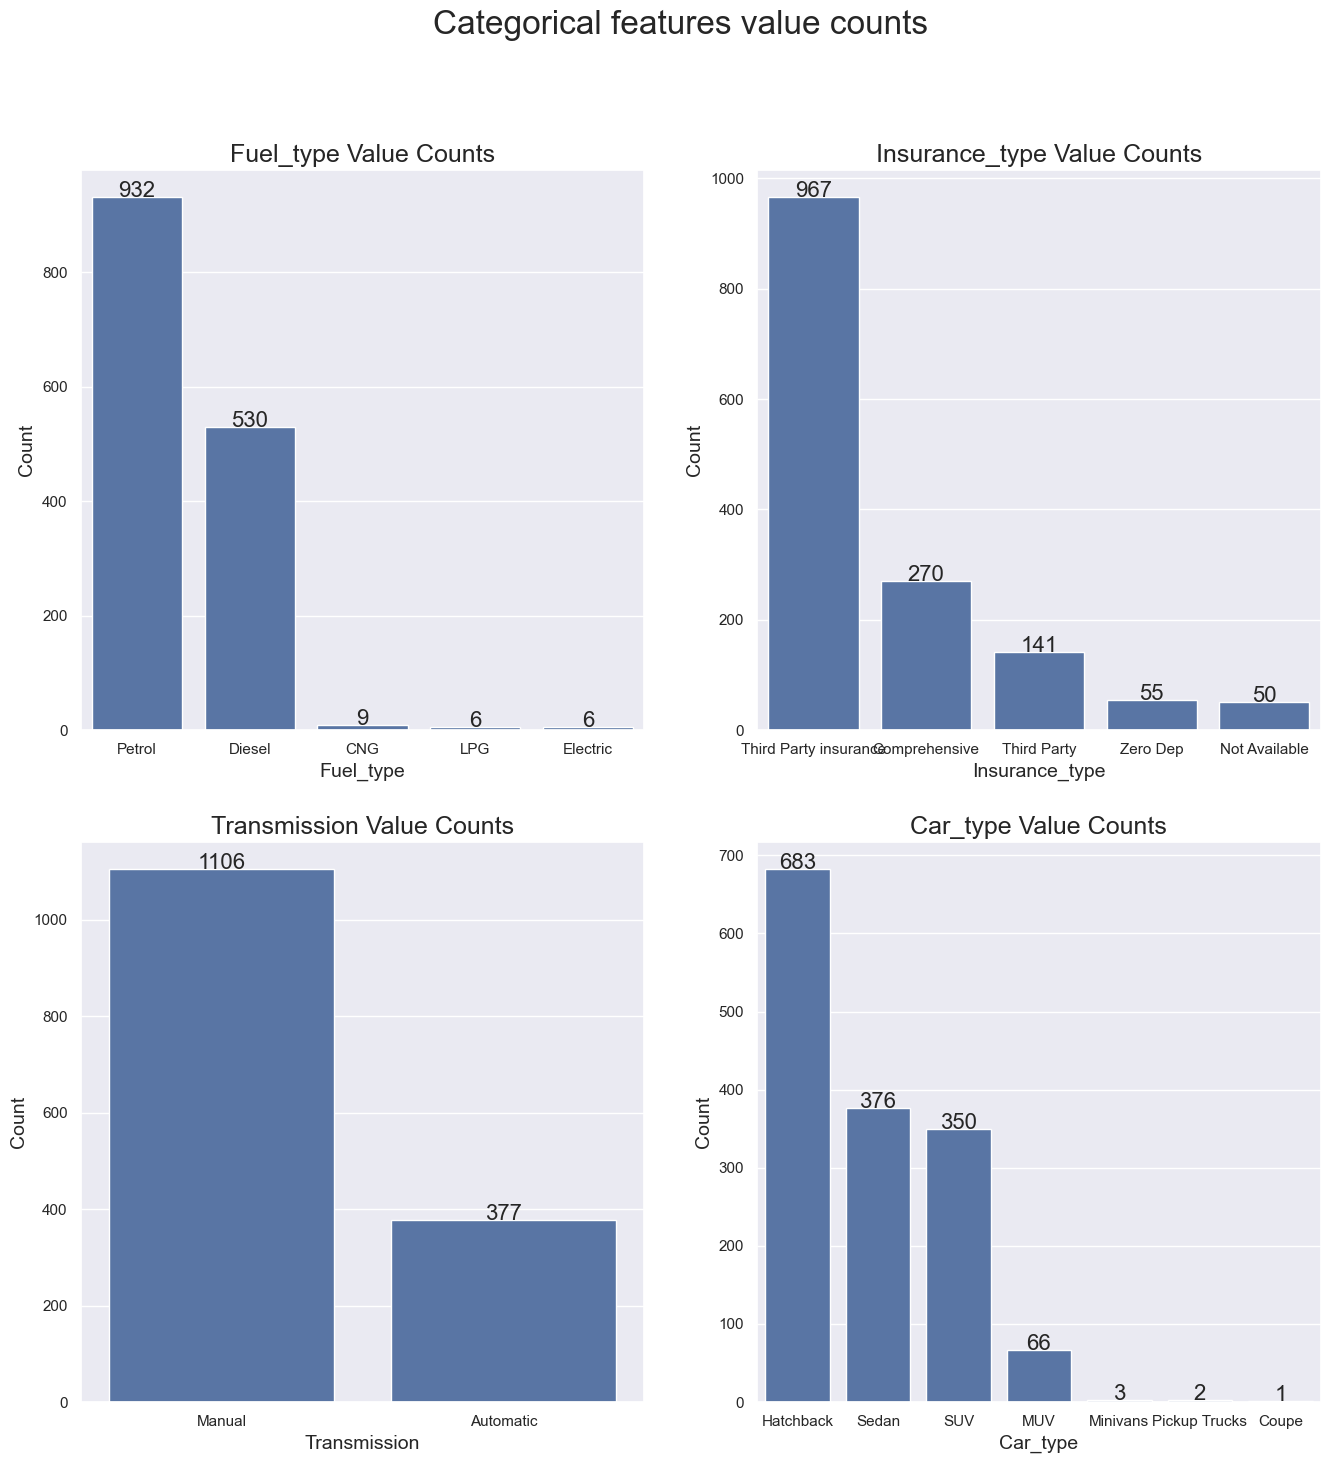

In [56]:
# Categorical columns analysis
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = data_next[cat_col[k]].value_counts()
    sns.countplot(data = data_next, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1